# <center>Programma la tua prima rete neurale
    
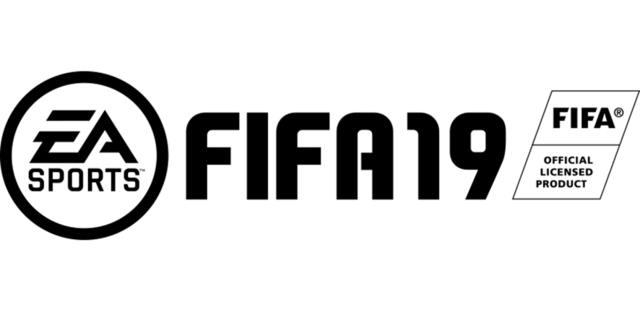

<font color="orange" size=5><center>Alessandro Cossard - FIFA19: EDA and Linear Regression </center></font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Pulizia dei dati

In [ ]:
#from google.colab import files

#uploaded = files.upload()

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
#from google.colab import files
 
#uploaded = files.upload()

In [ ]:
df.head().T

In [ ]:
df.columns

In [ ]:
df.describe().T

In [ ]:
df = df.drop(['Unnamed: 0','Photo','Flag','Club Logo','Loaned From','Release Clause','Joined'],axis=1)

# 2. Analisi esplorativa dei dati (EDA)

In [ ]:
df

In [ ]:
#Analisi sul numero di giocatori
print('Numero di giocatori in ogni nazione :' + '\n' + str(df['Nationality'].value_counts().head(10)))

In [ ]:
#Analisi sul giocatore
print('Potenziale maggiore : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Miglior performance generale : '+str(df.loc[df['Overall'].idxmax()][1]))

In [ ]:
#Adesso stampo il migliore per ogni categoria

cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][1]))
    i += 1

In [ ]:
#Il potenziale si abbassa con l'avanzare dell'età
df.plot(x='Age', y='Potential', style='o',alpha=0.1)
plt.show()

In [ ]:
#stessa cosa per la velocità
df.plot(x='Age', y='SprintSpeed', style='o',alpha=0.1)
plt.show()

In [ ]:
#con l'eta si migliora e poi si peggiora
df.plot(x='Age', y='Overall', style='o',alpha=0.1)
plt.show()

In [ ]:
#accelerazione e sprint seguono una relazione lineare
df.plot(x='Acceleration', y='SprintSpeed', style='o',alpha=0.1)
plt.show()

In [ ]:
#meno banale che cross e dribling siano lineari
df.plot(x='Crossing', y='Dribbling', style='o',alpha=0.1)
plt.show()

# 3. Modello a due variabili

In [ ]:
#x
speed = df['Acceleration']

In [ ]:
speed

In [ ]:
#y
label = df.Overall

In [ ]:
label

In [ ]:
df_t = pd.DataFrame(speed)

In [ ]:
df_t

In [ ]:
df_t['label'] = label

In [ ]:
df_t = df_t.dropna()

In [ ]:
plt.scatter(df_t['Acceleration'], df_t['label'],color='r',alpha=0.01)
plt.show()

In [ ]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(df_t['Acceleration'], df_t['label'], 
                                                                    test_size=0.2)

In [ ]:
#Alleno il modello

model_two = LinearRegression()
#model_two.fit(df_two.array.reshape(-1, 1) , label)
model_two.fit(np.array(X_train_two).reshape(-1,1), y_train_two)
print ('Coefficients = ', model_two.coef_, ', Intercept = ', model_two.intercept_)

In [ ]:
#adesso posso plottarlo
t=np.arange(0, 100, 0.001)

plt.scatter(X_train_two, y_train_two ,color='r',alpha=0.01)
plt.plot (t, t*0.09166291+60.46868291826634,color='b')
plt.show()

In [ ]:
pred = model_two.predict(X_test_two.array.reshape(-1, 1))

In [ ]:
pred

In [ ]:
#confronto il predict con le y di test

plt.scatter(X_test_two, pred, color='g')
plt.scatter(X_test_two, y_test_two,  color='r',alpha=0.01)
plt.show()

#chiaramente quelle verdi saranno tutte sulla retta della predizione
#la differenza tra la predizione e quelle reali è indice di quanto il mio modello performa bene

In [ ]:
print('r2 score: '+str(r2_score(y_test_two, pred)))

In [ ]:
#il modello perfroma malissimo ma con una solo feature è normale, per questo si usano molti dati
#lo scopo di usare due feature è solo la visualizzazione in 2D

# 4. Modello Multivariato

In [ ]:
#rimetto tutti i dati
df=pd.read_csv('data.csv')

In [ ]:
df

In [ ]:
#preparo i dati per la regressione lineare
cols_rm = df.columns[28:54]
df = df.drop(cols_rm, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

In [ ]:
#assegano un valore numerico al parametro real face
df['Real Face'] = df['Real Face'].apply(lambda x: x.replace('Yes','1'))
df['Real Face'] = df['Real Face'].apply(lambda x: x.replace('No','0'))

In [ ]:
#assegano un valore numerico al parametro piede preferito
df['Preferred Foot'] = df['Preferred Foot'].apply(lambda x: x.replace('Right','1'))
df['Preferred Foot'] = df['Preferred Foot'].apply(lambda x: x.replace('Left','0'))

In [ ]:
#assegano un valore numerico al parametro nazione piu forte
nationalities = df.Nationality.value_counts()
l_nat = nationalities[nationalities > 250].index.tolist()

for index, row in df.iterrows():
    if df.Nationality[index] in l_nat:
        df.Nationality[index] = 1
    else:
        df.Nationality[index] = 0

In [ ]:
for index, row in df.iterrows():
    if df['Position'][index] == 'GK':
        df['Position'][index] = 'GK'
    elif ((df['Position'][index] == 'RB') | (df['Position'][index] == 'LB') | (df['Position'][index] == 'CB') | (df['Position'][index] == 'LCB') | (df['Position'][index] == 'RCB') | (df['Position'][index] == 'RWB') | (df['Position'][index] == 'LWB') ):
        df['Position'][index] = 'DF'
    elif ((df['Position'][index] == 'LDM') | (df['Position'][index] == 'CDM') | (df['Position'][index] == 'RDM')):
        df['Position'][index] = 'DM'
    elif ((df['Position'][index] == 'LM') | (df['Position'][index] == 'LCM') | (df['Position'][index] == 'CM') | (df['Position'][index] == 'RCM') | (df['Position'][index] == 'RM')):
        df['Position'][index] = 'MF'
    elif ((df['Position'][index] == 'LAM') | (df['Position'][index] == 'CAM') | (df['Position'][index] == 'RAM') | (df['Position'][index] == 'LW') | (df['Position'][index] == 'RW')):
        df['Position'][index] = 'AM'
    elif ((df['Position'][index] == 'RS') | (df['Position'][index] == 'ST') | (df['Position'] [index]== 'LS') | (df['Position'][index] == 'CF') | (df['Position'][index] == 'LF') | (df['Position'][index] == 'RF')):
        df['Position'][index] = 'ST'

In [ ]:
#Splitto in due il work rate perchè è doppio
#WR = df["Work Rate"].str.split("/ ", n = 1, expand = True) 
#df["Work Rate 1"]= WR[0]   
#df["Work Rate 2"]= WR[1]
#df = df.drop('Work Rate', axis = 1)

In [ ]:
#l'overall è il target
label = df.Overall
df_feat = df.drop(['Overall'], axis = 1)

In [ ]:
label

In [ ]:
#Splitto train e test

X_train, X_test, y_train, y_test = train_test_split(df_feat, label, test_size=0.2)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
#uso la funzione dummies per le variabili non numeriche
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
#Applying Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
#faccio il predict sulle x di test
pred = model.predict(X_test)

#guardo quanto si avvicinano a quelle reali di test
print('r2 score: '+str(r2_score(y_test, pred)))

#r2 si avvicina a 1, ottimo